### Ashim Sedhain
### MSCS-634-B01: Advanced Big Data and Data Mining
### Project Deliverable 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df = pd.read_csv("./sample_data/salary_data.csv")

# This shows first 5 rows of the dataset

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# This describes the datatypes of each column in the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# This describes the dataframe: mean, standard deviation, min, max, 25%, 50%, and 75% percentile

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Handling Missing Values

In [ ]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [ ]:
df_clean = df.dropna()

I dropped the null rows due to their negligible impact on the dataset

# EDA

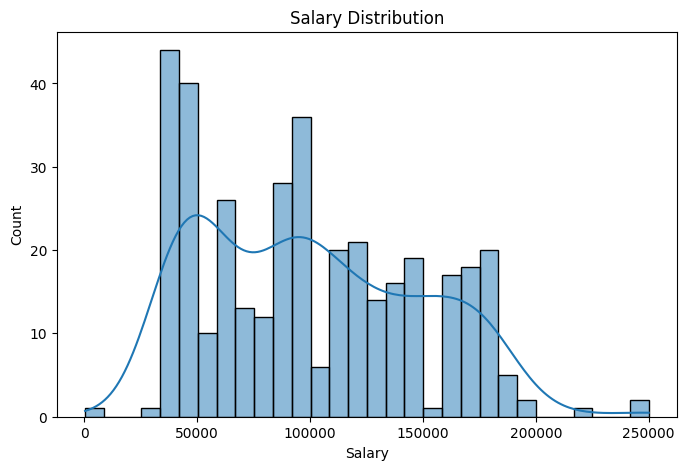

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

Histogram showing salary distribution

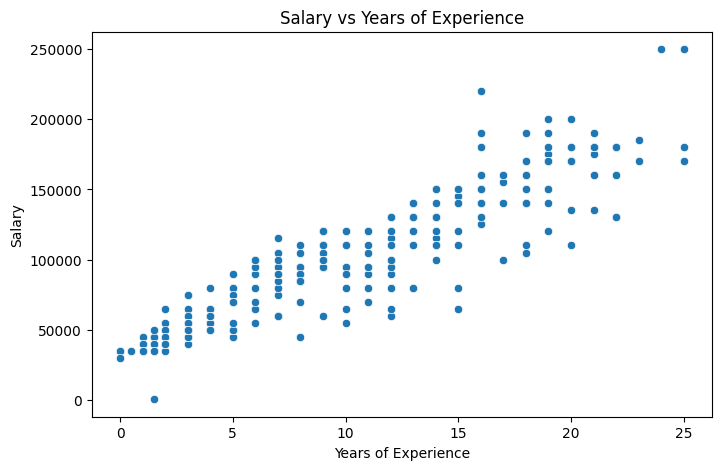

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Years of Experience', y='Salary', data=df_clean)
plt.title("Salary vs Years of Experience")
plt.show()

Scatter plot of salary and years of experience

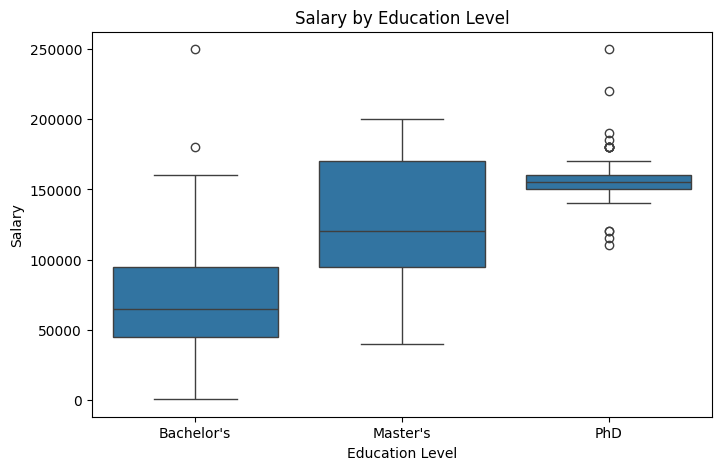

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Education Level', y='Salary', data=df_clean)
plt.title("Salary by Education Level")
plt.show()

Box plot showing salary by education level

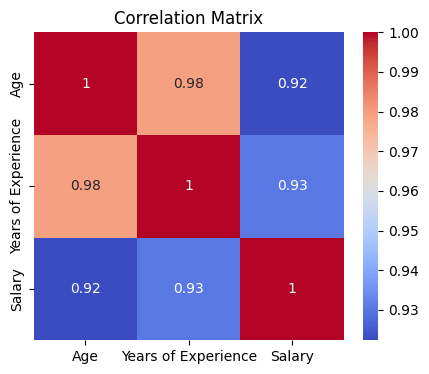

In [ ]:
numeric_cols = ['Age', 'Years of Experience', 'Salary']
plt.figure(figsize=(5,4))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Correlation matrix between Salary, Years of Experience, and Age

# Deliverable 2 tasks start from Here



### Standardized the education level so that there is no Apostrophes

In [ ]:
df_clean['Education Level'] = df_clean['Education Level'].str.replace("'", "", regex=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#### I used LabelEncoder for Gender because it’s a binary category and can be represented as 0 and 1. I used OrdinalEncoder for Education Level because the categories have a natural order (High School < Bachelor < Master < PhD). I used OneHotEncoder for Job Title since job titles have no meaningful order, and one-hot encoding prevents the model from interpreting them as ranked values.

In [ ]:
le = LabelEncoder()
df_clean['Gender_Encoded'] = le.fit_transform(df_clean['Gender'])

# Ordinal Encoding for Education Level
edu_order = [[ 'Bachelors', 'Masters', 'PhD']]
oe = OrdinalEncoder(categories=edu_order)
df_clean['Education_Encoded'] = oe.fit_transform(df_clean[['Education Level']])

# One-Hot Encode Job Title
df_clean = pd.get_dummies(df_clean, columns=['Job Title'], drop_first=True)

# Created new feature
df_clean['Experience_Age_Ratio'] = df_clean['Years of Experience'] / df['Age']

# Seniority bins
df_clean['Seniority_Level'] = pd.cut(
    df_clean['Years of Experience'],
    bins=[0, 5, 10, 50],
    labels=['Junior', 'Mid', 'Senior']
)

df_clean = pd.get_dummies(df_clean, columns=['Seniority_Level'], drop_first=True)

df_clean.head()

,Age,Gender,Education Level,Years of Experience,Salary,Gender_Encoded,Education_Encoded,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,...,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Experience_Age_Ratio,Seniority_Level_Mid,Seniority_Level_Senior
0,32.0,Male,Bachelors,5.0,90000.0,1,0.0,False,False,False,...,False,False,False,False,False,False,False,0.156250,False,False
1,28.0,Female,Masters,3.0,65000.0,0,1.0,False,False,False,...,False,False,False,False,False,False,False,0.107143,False,False
2,45.0,Male,PhD,15.0,150000.0,1,2.0,False,False,False,...,False,False,False,False,False,False,False,0.333333,False,True
3,36.0,Female,Bachelors,7.0,60000.0,0,0.0,False,False,False,...,False,False,False,False,False,False,False,0.194444,True,False
4,52.0,Male,Masters,20.0,200000.0,1,1.0,False,False,False,...,False,False,False,False,False,False,False,0.384615,False,True


# Regression Modeling
### I imported the necessary libraries, selected features, split the dataset for train and test, fitted the models, and finally made predictions

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting features
X = df_clean.drop(['Salary', 'Gender', 'Education Level'], axis=1)
y = df_clean['Salary']

# Spliting dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model selection
linear = LinearRegression()
lasso = Lasso(alpha=0.1)

# Fitting the models
linear.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Making predictions
y_pred_linear = linear.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

### Here, I am comparing the models and storing key metrics like R², MSE, RMSE in ***results*** object

In [ ]:
results = {}

# Linear Regression Metrics
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_linear),
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_linear))
}

# Lasso Regression Metrics
results['Lasso Regression'] = {
    'R2': r2_score(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
}

results

{'Linear Regression': {'R2': 0.8246632445640929,
  'MSE': 420384287.7352564,
  'RMSE': np.float64(20503.27504900757)},
 'Lasso Regression': {'R2': 0.8270780784482579,
  'MSE': 414594524.9449627,
  'RMSE': np.float64(20361.594361566156)}}

In [ ]:
cv_linear = cross_val_score(linear, X, y, cv=5, scoring='r2')
cv_lasso = cross_val_score(lasso, X, y, cv=5, scoring='r2')

print("Linear Regression CV R2:", cv_linear.mean())
print("Lasso Regression CV R2:", cv_lasso.mean())

Linear Regression CV R2: 0.8384537948441
Lasso Regression CV R2: 0.8407619317265533


### Visualizing R² and RMSE of the models

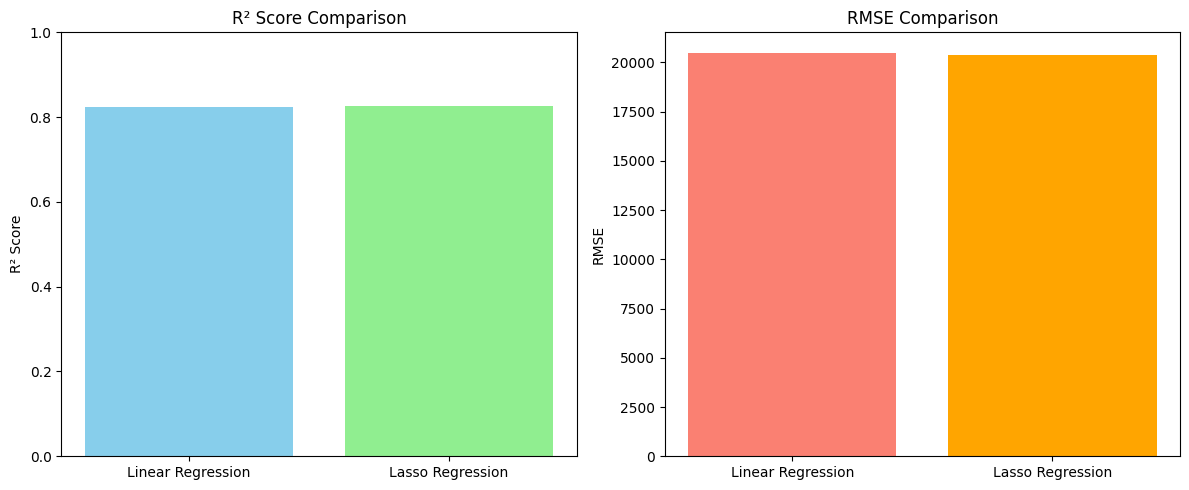

In [ ]:
models = list(results.keys())
r2_scores = [results[m]['R2'] for m in models]
rmse_scores = [results[m]['RMSE'] for m in models]

x = np.arange(len(models))
width = 0.5

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# R² bar chart
axes[0].bar(models, r2_scores, color=['skyblue','lightgreen'])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0,1)

# RMSE bar chart
axes[1].bar(models, rmse_scores, color=['salmon','orange'])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

### Residual Plot of linear regression

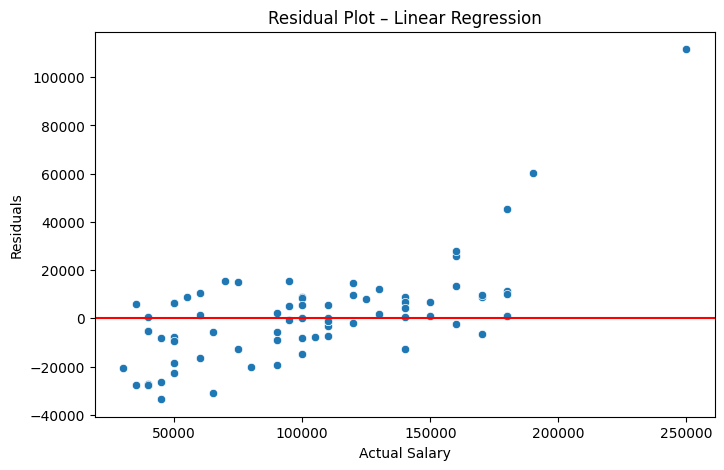

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=(y_test - y_pred_linear))
plt.axhline(0, color='red')
plt.xlabel("Actual Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot – Linear Regression")
plt.show()

# Deliverable 3 starts from here

#### I have already split the dataset into train and test, so we can use that for the classification models. I will be building Decision Tree and SVM models.

### First, let's build a decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Now, let's build a SVM and also perform hyperparameter tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)

grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
print("Best SVM Params:", grid.best_params_)

Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


### Now, let's make prediction for both models

In [ ]:
dt_pred = dt.predict(X_test)
svm_pred = best_svm.predict(X_test)

### Now, let's evaulate the models using Accuracy, F1 Score, Confusion Matrix, and ROC Curve

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Decision Tree": dt_pred,
    "SVM (Tuned)": svm_pred
}

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"{name} → Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

Decision Tree → Accuracy: 0.4000 | F1 Score: 0.3386
SVM (Tuned) → Accuracy: 0.3733 | F1 Score: 0.3362


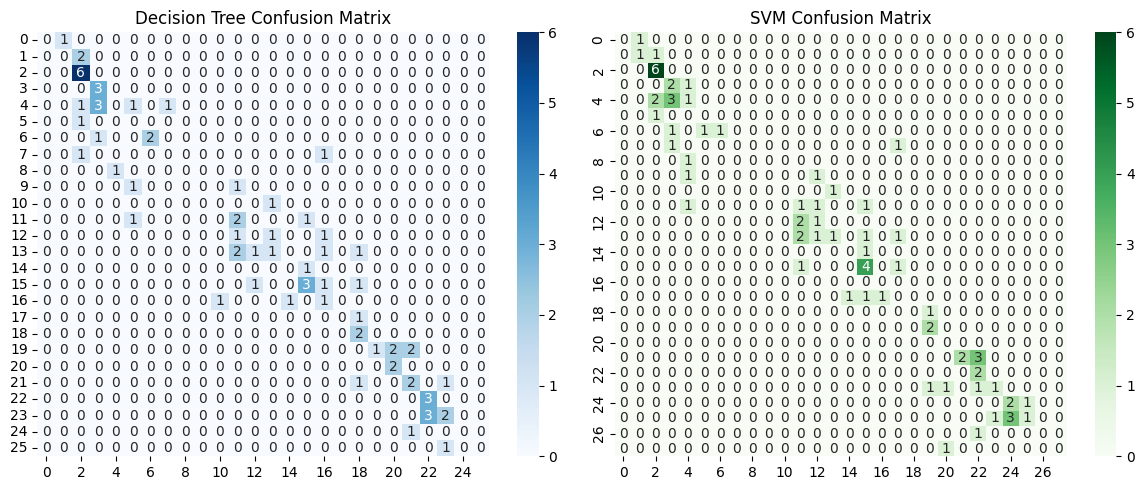

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap="Greens", fmt="d")
plt.title("SVM Confusion Matrix")

plt.tight_layout()
plt.show()

### I will be building K-Means clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

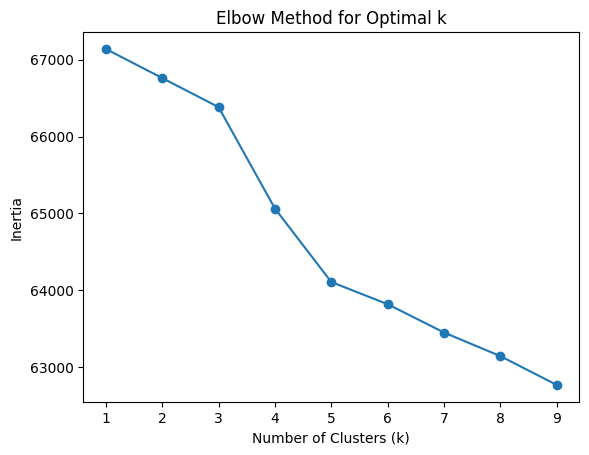

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

#### I selected k = 4 because the elbow method showed a pronounced drop in inertia from 3 to 4 clusters, indicating the fourth cluster captures significant additional structure in the data.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
df_clean['Cluster'] = clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_points = pca.fit_transform(X_scaled)

df_clean['PC1'] = pca_points[:, 0]
df_clean['PC2'] = pca_points[:, 1]

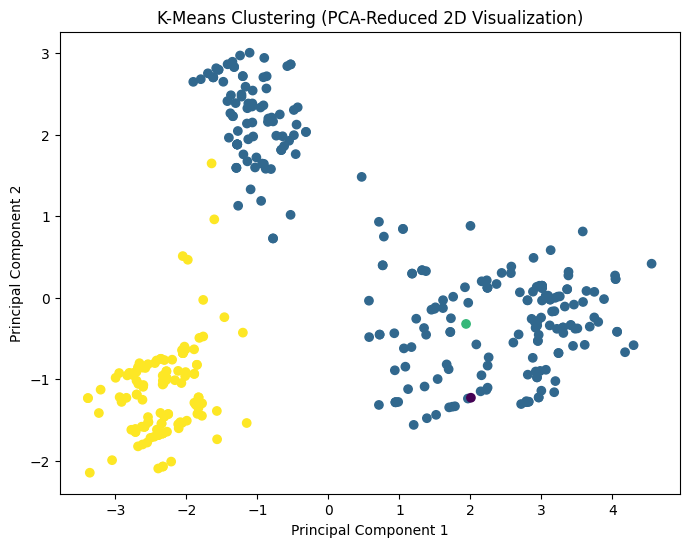

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['PC1'], df_clean['PC2'], c=df_clean['Cluster'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA-Reduced 2D Visualization)")
plt.show()

In [ ]:
cluster_summary = df_clean.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

               Age  Years of Experience         Salary  Gender_Encoded  \
Cluster                                                                  
0        43.000000            14.000000  120000.000000         0.00000   
1        41.264228            13.597561  126402.439024         0.52439   
2        42.000000            14.000000  115000.000000         1.00000   
3        29.808000             2.948000   49482.800000         0.51200   

         Education_Encoded  Job Title_Accountant  \
Cluster                                            
0                 1.000000                 0.000   
1                 0.764228                 0.000   
2                 1.000000                 0.000   
3                 0.080000                 0.008   

         Job Title_Administrative Assistant  Job Title_Business Analyst  \
Cluster                                                                   
0                                   0.00000                       0.000   
1                

# Cluster Observations
##### From the clusters we can see four distinct employee groups. Cluster 3 consists of younger, less experienced employees, around 30 years old with approximately 3 years of experience, and the lowest salaries, around \$49,000, representing entry level staff. The other three clusters, 0, 1, and 2, are mid-career professionals with similar ages, between 41 and 43 years, and experience of about 13 to 14 years, but differ slightly in salaries. Cluster 1 earns the highest, approximately $126,000, followed by Clusters 0 and 2, with around \$120,000 and \$115,000 respectively. These clusters clearly separate entry-level employees from experienced staff while highlighting subtle salary variations among mid-career professionals.

In [ ]:
df_mining = df_clean.copy()

In [ ]:
df_mining.head()

,Age,Gender,Education Level,Years of Experience,Salary,Gender_Encoded,Education_Encoded,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,...,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Experience_Age_Ratio,Seniority_Level_Mid,Seniority_Level_Senior,Cluster,PC1,PC2
0,32.0,Male,Bachelors,5.0,90000.0,1,0.0,False,False,False,...,False,False,False,False,0.156250,False,False,3,-1.818394,-0.491465
1,28.0,Female,Masters,3.0,65000.0,0,1.0,False,False,False,...,False,False,False,False,0.107143,False,False,3,-1.568367,-1.735061
2,45.0,Male,PhD,15.0,150000.0,1,2.0,False,False,False,...,False,False,False,False,0.333333,False,True,1,2.862811,-0.258103
3,36.0,Female,Bachelors,7.0,60000.0,0,0.0,False,False,False,...,False,False,False,False,0.194444,True,False,3,-1.608008,0.962116
4,52.0,Male,Masters,20.0,200000.0,1,1.0,False,False,False,...,False,False,False,False,0.384615,False,True,1,3.380587,0.274501


In [ ]:
df_mining['Experience_Category'] = pd.cut(
    df_mining['Years of Experience'],
    bins=[0, 5, 10, 20, 40],
    labels=['0–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
)

df_mining['Salary_Category'] = pd.qcut(df_mining['Salary'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Select categorical columns
cat_cols = ['Gender', 'Education Level', 'Experience_Category', 'Salary_Category']

# Convert rows into transactions
transactions = df_mining[cat_cols].astype(str).values.tolist()

te = TransactionEncoder()
data = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(data, columns=te.columns_)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Frequent itemsets with minimum support threshold
frequent_itemsets = apriori(df_te, min_support=0.05, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.316354,(0–5 yrs)
1,0.345845,(10–20 yrs)
2,0.075067,(20+ yrs)
3,0.254692,(5–10 yrs)
4,0.600536,(Bachelors)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
209,"(Very High, Female)",(PhD),0.101877,0.136729,0.056300,0.552632,4.041796,1.0,0.042371,1.929664,0.837953,0.308824,0.481775,0.482198
212,(PhD),"(Very High, Female)",0.136729,0.101877,0.056300,0.411765,4.041796,1.0,0.042371,1.526810,0.871783,0.308824,0.345040,0.482198
16,(Very High),(20+ yrs),0.227882,0.075067,0.067024,0.294118,3.918067,1.0,0.049918,1.310322,0.964583,0.284091,0.236829,0.593487
17,(20+ yrs),(Very High),0.075067,0.227882,0.067024,0.892857,3.918067,1.0,0.049918,7.206434,0.805217,0.284091,0.861235,0.593487
148,(PhD),"(Very High, 10–20 yrs)",0.136729,0.160858,0.085791,0.627451,3.900654,1.0,0.063797,2.252434,0.861413,0.405063,0.556036,0.580392
145,"(Very High, 10–20 yrs)",(PhD),0.160858,0.136729,0.085791,0.533333,3.900654,1.0,0.063797,1.849866,0.886182,0.405063,0.459420,0.580392
211,(Very High),"(PhD, Female)",0.227882,0.069705,0.056300,0.247059,3.544344,1.0,0.040416,1.235548,0.929729,0.233333,0.190642,0.527376
210,"(PhD, Female)",(Very High),0.069705,0.227882,0.056300,0.807692,3.544344,1.0,0.040416,4.015013,0.771648,0.233333,0.750935,0.527376
51,(PhD),(Very High),0.136729,0.227882,0.109920,0.803922,3.527797,1.0,0.078761,3.937802,0.830026,0.431579,0.746051,0.643137
50,(Very High),(PhD),0.227882,0.136729,0.109920,0.482353,3.527797,1.0,0.078761,1.667682,0.928015,0.431579,0.400365,0.643137


# Observations
##### The association rule mining results revealed clear patterns connecting education, experience, and salary. The strongest rules show that employees with PhD degrees are far more likely to earn a Very High salary, supported by high confidence values (around 0.80) and lift values above 3.5. Similarly, employees with 20+ years of experience also show a strong association with Very High salaries, indicating that advanced education and long-term experience are major factors influencing pay. Another notable pattern is that high-earning female employees are especially likely to hold PhDs, based on lift values above 4. Overall, the rules highlight meaningful relationships showing how education level, experience, and certain demographic factors align with higher earnings within the dataset.
